In [88]:
%matplotlib inline
import pandas as pd

import plotly.plotly as py
from plotly.graph_objs import *

In [99]:
import seaborn as sns

In [89]:
df = pd.read_csv("normal_il_data_w_geocode.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [90]:
df.head()

,id,date,time,fault,motorist_name,motorist_gender,insured,veh_make,veh_model,veh_year,...,location_bike,arrest,officer_id,m_citation,m_section,c_citation,c_section,hospital,summary,lat_long
0,14-358,03/26/14,05:18:00 PM,cyclist,Jonathan T. Coughlon,m,y,ford,edge,2011,...,sidewalk,cyclist,7700,NaN,NaN,237233,11-1002(b),refused,"cyclist on sidewalk, didn't stop at intersection","[40.5098029, -89.00439019999999]"
1,14-575,06/04/14,03:23:00 PM,unknown,Anna M. Eastman,f,y,ford,taurus,2004,...,parking_lot,no,na,NaN,NaN,NaN,NaN,bromenn,kids playing in a parking lot,"[40.502852, -88.98104599999999]"
2,14-576,06/04/14,09:40:00 PM,cyclist,Zachery A. Perhoch,m,y,chevrolet,unknown,2009,...,intersection,cyclist,954,NaN,NaN,241473,11-306,bromenn,"cyclist ran a red light, hit by car","[40.5049212, -88.9822318]"
3,A2014-778,08/14/14,03:40:00 PM,cyclist,Sarah L. Tretter,f,y,mitsubishi,outlander,2012,...,sidewalk,cyclist,871,NaN,NaN,NaN,NaN,refused,"cyclist on sidewalk, didn't stop at intersection","[40.5208051, -88.96081679999999]"
4,A2014-797,08/18/14,05:45:00 PM,motorist,Edward C. Houchens,m,y,cadillac,eldorado,1999,...,crosswalk,no,700,NaN,NaN,NaN,NaN,no,motorist turned into the rear wheel of a cycli...,"[40.5049212, -88.9822318]"


In [117]:
bike_locs_percent= df.location_bike.value_counts() / df.location_bike.value_counts().sum()

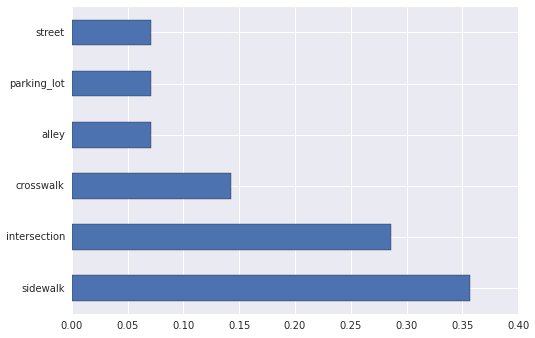

In [123]:
bike_locs_percent.plot(kind='barh')

In [91]:
#Who was at fault?

data = Data([
    Bar(
        x = df.fault.value_counts().index,
        y = df.fault.value_counts().values
    )
])

layout = Layout(
    title='Who Was At Fault',
)

fig=Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='fault_values')

In [84]:
def get_hour(x):
    hour = int(x.split(':')[0])
    if x.split(' ')[1] =='PM':
        hour += 12
    return hour

hours = df.time.map(get_hour)

In [86]:
def get_month(x):
    month = int(x.split('/')[0])
    
    return month

months = df.date.map(get_month)

In [83]:
#What Time do crashes happen?

data = Data([
    Histogram(
        x = hours,
        histnorm='count',
        autobinx=False,
        xbins=XBins(
        start=0,
        end=24,
        size=1
    ),
)])

layout = Layout(
    title='What Times Do Crashes Occur At?',
    
     xaxis=XAxis(
        title='Hour'
    ),
    yaxis=YAxis(
        title='Count'
    ),
)

fig=Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='time_hist')

In [87]:
#What Months Do Crashes Occur?

data = Data([
    Histogram(
        x = months,
        histnorm='count',
        autobinx=False,
        xbins=XBins(
        start=0,
        end=12,
        size=1
    ),
)])

layout = Layout(
    title='What Times Do Crashes Occur At?',
    
     xaxis=XAxis(
        title='Month'
    ),
    yaxis=YAxis(
        title='Count'
    ),
)

fig=Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='month_hist')